In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('kr2.csv', sep=';')
df

,Retail_space_sq._m.,Floor,Number_of_employees_in_the_store,Type,Rating_in_Google,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,1,1,Social,3.0,1230.0,76.85,13884.0,3807.0,1,1,0,1,0,unsuccessful
1,22.00,1,1,Social,4.1,2715.0,84.86,11700.0,9086.0,0,0,0,1,0,unsuccessful
2,13.00,1,1,Social,3.0,878.0,112.02,6786.0,6383.0,0,0,0,1,0,unsuccessful
3,18.00,1,1,Standard,3.0,2346.0,119.80,12948.0,4.0,1,1,1,1,0,unsuccessful
4,25.00,1,1,Social,4.0,2542.0,94.88,11427.0,426.0,0,0,0,0,0,unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,1,3,Premium,4.0,13552.0,107.37,9399.0,12018.0,0,0,0,1,1,successful
65,21.50,1,2,Premium,2.3,7598.0,89.13,14079.0,10121.0,0,0,0,0,0,successful
66,115.23,1,1,Standard,3.0,5431.0,105.62,11427.0,7221.0,0,0,0,1,0,unsuccessful
67,34.80,1,2,Social,4.3,4375.0,168.07,13338.0,3137.0,0,0,0,0,0,unsuccessful


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Retail_space_sq._m.                   69 non-null     float64
 1   Floor                                 69 non-null     int64  
 2   Number_of_employees_in_the_store      69 non-null     int64  
 3   Type                                  69 non-null     object 
 4   Rating_in_Google                      69 non-null     float64
 5   Number_of_checks_per_month            62 non-null     float64
 6   Average_check                         62 non-null     float64
 7   Average_income_of_the_population_UAH  64 non-null     float64
 8   The_average_population                64 non-null     float64
 9   Fast_food                             69 non-null     int64  
 10  Takeaway_coffee                       69 non-null     int64  
 11  Pizzeria             

Текущие данные состоят из 15 переменных и имеют 69 объектов. Две переменные являються категориальными, остальные - количественными, из них 5 параметров - это бинарные переменные. 

При анализе данных было виявлено несколько пропусков в 4-х переменных, которые необходимо будет заполнить. Также, прежде чем приступать к классификации, следует провести подготовку данных, к чему сейчас мы и приступим.

### Preprocessing

In [5]:
df.describe()

,Retail_space_sq._m.,Floor,Number_of_employees_in_the_store,Rating_in_Google,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road
count,69.000000,69.0,69.000000,69.000000,62.000000,62.000000,64.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,1.0,1.869565,3.810145,7097.209677,95.897581,11306.843750,6061.312500,0.202899,0.217391,0.086957,0.449275,0.376812
std,21.704293,0.0,0.838645,0.695605,4275.181297,19.192685,2438.706261,4409.636752,0.405104,0.415493,0.283836,0.501065,0.488137
min,4.000000,1.0,1.000000,1.800000,878.000000,65.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.0,1.000000,3.000000,3661.000000,82.420000,10095.750000,1615.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,1.0,2.000000,4.000000,6430.500000,93.855000,11680.500000,6503.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.0,2.000000,4.300000,9070.750000,102.787500,13074.750000,9598.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119.300000,1.0,4.000000,5.000000,17537.000000,168.070000,14937.000000,14157.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Переменная Floor не является для нас информативной, так как во всех наблюдениях она принимает одинаковое значение. Поэтому эта переменная будет удалена. 
Исходя из статистических показателей, возможные выбросы наблюдаются в переменых Retail_space_sq._m., Average_check. 

In [6]:
df = df.drop(['Floor'], axis='columns', inplace=False)
df.head(5)

,Retail_space_sq._m.,Number_of_employees_in_the_store,Type,Rating_in_Google,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.0,1,Social,3.0,1230.0,76.85,13884.0,3807.0,1,1,0,1,0,unsuccessful
1,22.0,1,Social,4.1,2715.0,84.86,11700.0,9086.0,0,0,0,1,0,unsuccessful
2,13.0,1,Social,3.0,878.0,112.02,6786.0,6383.0,0,0,0,1,0,unsuccessful
3,18.0,1,Standard,3.0,2346.0,119.80,12948.0,4.0,1,1,1,1,0,unsuccessful
4,25.0,1,Social,4.0,2542.0,94.88,11427.0,426.0,0,0,0,0,0,unsuccessful


In [7]:
df.isnull().sum()

Retail_space_sq._m.                     0
Number_of_employees_in_the_store        0
Type                                    0
Rating_in_Google                        0
Number_of_checks_per_month              7
Average_check                           7
Average_income_of_the_population_UAH    5
The_average_population                  5
Fast_food                               0
Takeaway_coffee                         0
Pizzeria                                0
Main_street                             0
Intra-quarter_road                      0
Success                                 0
dtype: int64

Итак, необходимо избавиться от пропусков в переменных Number_of_checks_per_month, Average_check, Average_income_of_the_population_UAH и The_average_population. Все эти переменные количественные, поэтому заполнять пропуски мы будем при помощи средних значений по каждой переменной.

In [8]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [9]:
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [10]:
df.isnull().sum()

Retail_space_sq._m.                     0
Number_of_employees_in_the_store        0
Type                                    0
Rating_in_Google                        0
Number_of_checks_per_month              0
Average_check                           0
Average_income_of_the_population_UAH    0
The_average_population                  0
Fast_food                               0
Takeaway_coffee                         0
Pizzeria                                0
Main_street                             0
Intra-quarter_road                      0
Success                                 0
dtype: int64

Проверка говорит нам о том, что мы успешно избавились от всех пропусков. Теперь переходим к избавлению модели от выбросов. Как ранее уже предполагалось, выбросы присутствуют в параметрах Retail_space_sq._m. и Average_check. Поэтому для них мы проведем выявление выбросов и замену этих самых выбосов на крайнее допустимое значение относительно правиза 3-х сигм.

In [11]:
space = []
for x in df['Retail_space_sq._m.']:
    if x > round(df['Retail_space_sq._m.'].mean() + 3*df['Retail_space_sq._m.'].std()):
        x = round(df['Retail_space_sq._m.'].mean() + 3*df['Retail_space_sq._m.'].std()) 
    space.append(x)
df['Retail_space_sq._m.'] = space
df['Retail_space_sq._m.'].describe()

count     69.000000
mean      34.371710
std       19.894479
min        4.000000
25%       22.000000
50%       27.500000
75%       41.000000
max      100.000000
Name: Retail_space_sq._m., dtype: float64

In [12]:
check = []
for x in df['Average_check']:
    if x > round(df['Average_check'].mean() + 3*df['Average_check'].std()):
        x = round(df['Average_check'].mean() + 3*df['Average_check'].std()) 
    check.append(x)
df['Average_check'] = check
df['Average_check'].describe()

count     69.000000
mean      95.635697
std       17.228307
min       65.270000
25%       84.860000
50%       95.020000
75%      101.210000
max      150.000000
Name: Average_check, dtype: float64

По полученным статистикам делаем вывод о том, что нам удалось избавиться от выбросов.

Теперь переходим к кодированию данных, так как у нас в датасете присутствуют две качественные переменные.

In [13]:
dfs = df[['Success','Type']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
1,Type,5,"[Social, Standard, Premium, Standard Plus, Soc...",object
0,Success,2,"[unsuccessful, successful]",object


In [14]:
from sklearn import preprocessing
df['Success'] = preprocessing.LabelEncoder().fit_transform(df['Success'])
df

,Retail_space_sq._m.,Number_of_employees_in_the_store,Type,Rating_in_Google,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,1.0,Social,3.0,1230.0,76.85,13884.0,3807.0,1.0,1.0,0.0,1.0,0.0,1
1,22.00,1.0,Social,4.1,2715.0,84.86,11700.0,9086.0,0.0,0.0,0.0,1.0,0.0,1
2,13.00,1.0,Social,3.0,878.0,112.02,6786.0,6383.0,0.0,0.0,0.0,1.0,0.0,1
3,18.00,1.0,Standard,3.0,2346.0,119.80,12948.0,4.0,1.0,1.0,1.0,1.0,0.0,1
4,25.00,1.0,Social,4.0,2542.0,94.88,11427.0,426.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,3.0,Premium,4.0,13552.0,107.37,9399.0,12018.0,0.0,0.0,0.0,1.0,1.0,0
65,21.50,2.0,Premium,2.3,7598.0,89.13,14079.0,10121.0,0.0,0.0,0.0,0.0,0.0,0
66,100.00,1.0,Standard,3.0,5431.0,105.62,11427.0,7221.0,0.0,0.0,0.0,1.0,0.0,1
67,34.80,2.0,Social,4.3,4375.0,150.00,13338.0,3137.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
t = {'Social':1,'Social Plus':2,'Standard':3,'Standard Plus':4,'Premium':5}

df['Type'] = df['Type'].map(t)
df

,Retail_space_sq._m.,Number_of_employees_in_the_store,Type,Rating_in_Google,Number_of_checks_per_month,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,1.0,1,3.0,1230.0,76.85,13884.0,3807.0,1.0,1.0,0.0,1.0,0.0,1
1,22.00,1.0,1,4.1,2715.0,84.86,11700.0,9086.0,0.0,0.0,0.0,1.0,0.0,1
2,13.00,1.0,1,3.0,878.0,112.02,6786.0,6383.0,0.0,0.0,0.0,1.0,0.0,1
3,18.00,1.0,3,3.0,2346.0,119.80,12948.0,4.0,1.0,1.0,1.0,1.0,0.0,1
4,25.00,1.0,1,4.0,2542.0,94.88,11427.0,426.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,3.0,5,4.0,13552.0,107.37,9399.0,12018.0,0.0,0.0,0.0,1.0,1.0,0
65,21.50,2.0,5,2.3,7598.0,89.13,14079.0,10121.0,0.0,0.0,0.0,0.0,0.0,0
66,100.00,1.0,3,3.0,5431.0,105.62,11427.0,7221.0,0.0,0.0,0.0,1.0,0.0,1
67,34.80,2.0,1,4.3,4375.0,150.00,13338.0,3137.0,0.0,0.0,0.0,0.0,0.0,1


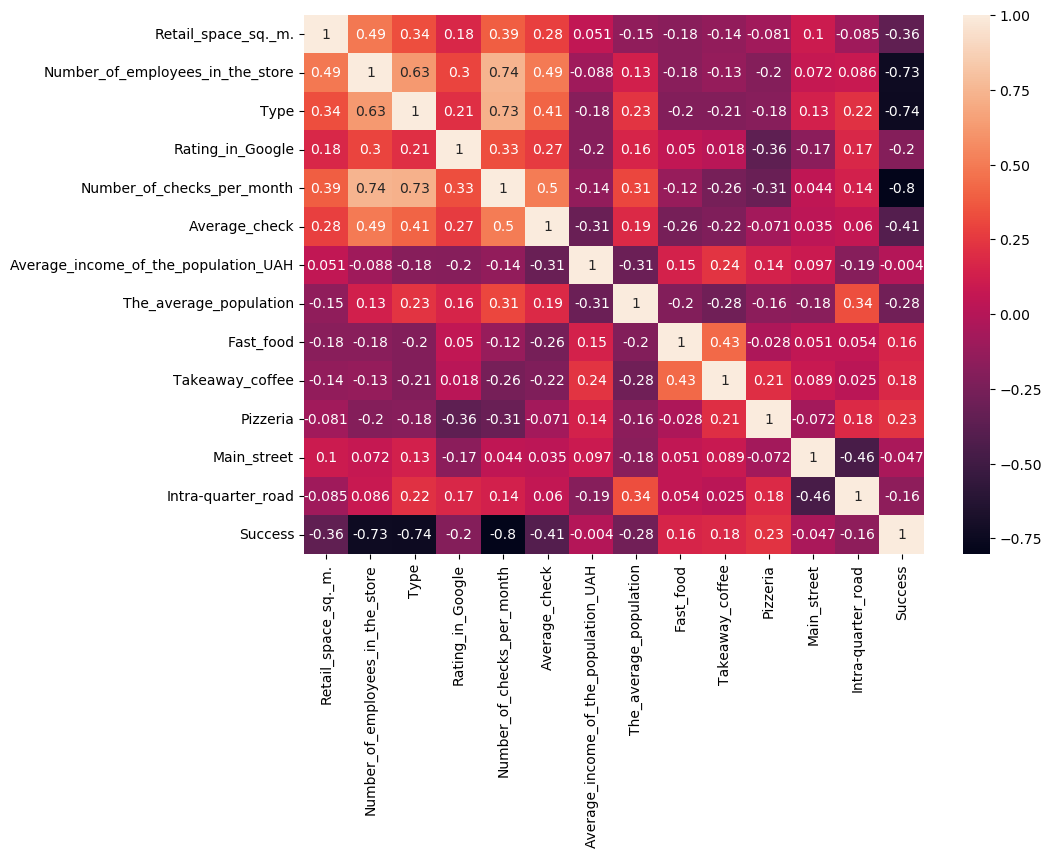

In [16]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, annot=True)
plt.show()

Классификация будет проводиться по переменной Success. Как видно по матрице корреляций, сильное воздействие на зависимую переменную имеют параметры Number_of_employees_in_the_store, Type, Number_of_checks_per_month. Но следует отметить то факт, что все эти переменные также коррелируют между собой, то есть между ними есть зависимость. Поэтому необходимо исключить некоторые переменные во избежания мультиколлинеарности. Так как наибольшее влияние на зависимую переменную имеет фактор Number_of_checks_per_month, то именно его я и буду оставлять в модели. Остальные два параметра будут исключены.

В результате получилось так, что при построении логит-модели у меня была сингулярная матрица. Поэтому я убрала сильно коррелируемые с Success параметры.

In [17]:
df = df.drop(['Number_of_employees_in_the_store','Number_of_checks_per_month', 'Type'], axis='columns', inplace=False)
df

,Retail_space_sq._m.,Rating_in_Google,Average_check,Average_income_of_the_population_UAH,The_average_population,Fast_food,Takeaway_coffee,Pizzeria,Main_street,Intra-quarter_road,Success
0,9.00,3.0,76.85,13884.0,3807.0,1.0,1.0,0.0,1.0,0.0,1
1,22.00,4.1,84.86,11700.0,9086.0,0.0,0.0,0.0,1.0,0.0,1
2,13.00,3.0,112.02,6786.0,6383.0,0.0,0.0,0.0,1.0,0.0,1
3,18.00,3.0,119.80,12948.0,4.0,1.0,1.0,1.0,1.0,0.0,1
4,25.00,4.0,94.88,11427.0,426.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,4.0,107.37,9399.0,12018.0,0.0,0.0,0.0,1.0,1.0,0
65,21.50,2.3,89.13,14079.0,10121.0,0.0,0.0,0.0,0.0,0.0,0
66,100.00,3.0,105.62,11427.0,7221.0,0.0,0.0,0.0,1.0,0.0,1
67,34.80,4.3,150.00,13338.0,3137.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
df.to_csv('prep.csv', sep=';', index=False)

### LogisticRegression

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Провели стандартное шкалирование данных на основе обучающей выборки. 

In [21]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.497192
         Iterations 7
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.252   
Dependent Variable: y                AIC:              74.6911 
Date:               2021-12-02 15:11 BIC:              94.7644 
No. Observations:   55               Log-Likelihood:   -27.346 
Df Model:           9                LL-Null:          -36.572 
Df Residuals:       45               LLR p-value:      0.030266
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1      -0.9107     0.4821   -1.8891   0.0589   -1.8556    0.0342
x2       0.0595     0.3571    0.1666   0.8677   -0.6405    0.7595
x3      -1.0659  

Уровень объяснённости модели низкого качества - 25%. Среди 11 переменных относительно р-значений можно выделить только один параментр при степени значимости 5%. Выделим значимые параметы при помощи рекурсивного исключения признаков.

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[ True False  True False False False False  True False False]
[1 8 1 2 3 6 7 1 5 4]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [23]:
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0, 2, 7]
№	Index	Feature
0	0	Retail_space_sq._m.
1	2	Average_check
2	7	Pizzeria


Автоматизированный отбор параметров выделил три значимых параметра. 

In [24]:
X_train=X_train[:, selected_columns]
X_test=X_test[:, selected_columns]

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
y_pred = lr.predict(X_test)
lr.score(X_test,y_test), lr.score(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(0.7857142857142857, 0.7818181818181819)

Коэффициенты детерминации находятся на достаточно хорошем уровне, по сравнению с R2 начальной модели, где учитывались все факторы.

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  3]
 [ 0 10]]


Три элемента были распознаны неверно. Точность модели составляет 79%, это достаточно хороший результат. Модель лучше распознает положительные случаи, то есть  успех торговой точки.

In [28]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_class.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()